In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from nbodykit.lab import *
from nbodykit import setup_logging, style

import os
import matplotlib.pyplot as plt
plt.style.use(style.notebook)

import numpy as np
import math

In [3]:
setup_logging() # turn on logging to screen

In [4]:
#redshift = 0.5
#cosmo = cosmology.Planck15

In [5]:
# Tune kmin and kmax according to particle positions ranges (length unit of the simulation box)
# Default kmax = kNyq = pi Nmesh/Lbox, and 2pi/Lbox its the minimum value of dk.
#myNmesh=1024
#mykmin=0.000001
#mykmax=0.003
myNmesh=512
mykmin=0.0001
mykmax=3.0

nkval=500
mydk=(mykmax-mykmin)/(nkval - 1)
xr1=0.01
xr2=10
yr1=1
yr2=100000
mylos=[0,0,1]
print('dk = ', mydk)

# To have units in Mpc
#kunit=1e3
#psunit=1e-9
kunit=1.0
psunit=1.0


sim_box_name = "GR_Box5001_z0p000_notebook"

('dk = ', 0.006011823647294589)


In [6]:
# define download dir for the data to the current directory
#download_dir = "."
#download_dir = "/Users/mar/Research/Codigos/NagBody_pkg/NagBody_sources/colas/mglpicola_fofr/runs/mglpicola_fofr/B0256_P0256_M0256_testing/F5/box5001/output/."
#download_dir = "/Users/mar/Research/Codigos/NagBody_pkg/NagBody_sources/colas/mglpicola_fofr/runs/mglpicola_fofr/B0256_P0256_M0256/F5/box5001/output/."
download_dir = "./output"

In [7]:
# NOTE: change this path if you downloaded the data somewhere else!
#data_path = os.path.join(download_dir, 'snapshot_z0p000.0')
#data_path = os.path.join(download_dir, 'snapshot_z0p000.*')
data_path = os.path.join(download_dir, 'snapshot_z0p000.0')


# initialize the Gadget1 catalog objects for data and randoms
data = Gadget1Catalog(data_path)

/anaconda2/envs/nbodykit-env/lib/python2.7/site-packages/nbodykit/io/gadget.py:152: UserWarning: Cannot decide the item size of `Mass`, assuming 4 bytes.
  warnings.warn("Cannot decide the item size of `%s`, assuming 4 bytes." % (column))
/anaconda2/envs/nbodykit-env/lib/python2.7/site-packages/nbodykit/io/gadget.py:152: UserWarning: Cannot decide the item size of `InternalEnergy`, assuming 4 bytes.
  warnings.warn("Cannot decide the item size of `%s`, assuming 4 bytes." % (column))
/anaconda2/envs/nbodykit-env/lib/python2.7/site-packages/nbodykit/io/gadget.py:152: UserWarning: Cannot decide the item size of `Density`, assuming 4 bytes.
  warnings.warn("Cannot decide the item size of `%s`, assuming 4 bytes." % (column))
/anaconda2/envs/nbodykit-env/lib/python2.7/site-packages/nbodykit/io/gadget.py:152: UserWarning: Cannot decide the item size of `SmoothingLength`, assuming 4 bytes.
  warnings.warn("Cannot decide the item size of `%s`, assuming 4 bytes." % (column))
[ 000007.67 ]   0: 1

We can analyze the available columns in the catalogs via the ``columns`` attribute:

In [8]:
print('data columns = ', data.columns)
print(' ')
print('data = ', data.attrs)
print(' ')
Redshift = data.attrs['Redshift']
az = 1./(Redshift+1)
Hubble = 1.29127 * 100.0*data.attrs['HubbleParam']
print('Redshift =', Redshift)
print('a =', az)
print('Hubble (z) =', Hubble)
aHofa = az*math.sqrt(data.attrs['Omega0']/(az*az*az) + data.attrs['OmegaLambda'])
print('aHofa =', aHofa)
mpc_unit = 1000.0 # use 1.0 if units are Mpc.

('data columns = ', ['GadgetVelocity', 'ID', 'Mass', 'Position', 'Selection', 'Value', 'Weight'])
 
('data = ', {'flag_entr_ics': 0, 'Omega0': 0.281, 'FlagAge': 0, 'Npart': array([        0, 134217728,         0,         0,         0,         0],
      dtype=uint32), 'BoxSize': 512.0, 'FlagMetals': 0, 'HubbleParam': 0.697, 'Time': 1.0, 'FlagFeedback': 0, 'NumFiles': 1, 'FlagCooling': 0, 'Redshift': 0.0, 'FlagSfr': 0, 'OmegaLambda': 0.673, 'Nall': array([        0, 134217728,         0,         0,         0,         0],
      dtype=uint32), 'Massarr': array([0.        , 7.79915428, 0.        , 0.        , 0.        ,
       0.        ]), 'NallHW': array([0, 0, 0, 0, 0, 0], dtype=uint32)})
 
('Redshift =', 0.0)
('a =', 1.0)
('Hubble (z) =', 90.00151899999999)
('aHofa =', 0.9767292357659825)


In [9]:
pos = data['Position']
nsnap = pos.shape[0]
print(nsnap)
print(pos)
vel=data['GadgetVelocity']
print(vel)

134217728
dask.array<array, shape=(134217728, 3), dtype=float32, chunksize=(100000, 3)> first: [511.6931    505.38718     1.1871293] last: [510.11917 504.6578  511.3634 ]
dask.array<array, shape=(134217728, 3), dtype=float32, chunksize=(100000, 3)> first: [ -23.679337 -292.61182    50.16451 ] last: [ -51.36885  -288.8523     10.942483]


In [10]:
# convert to a MeshSource, using TSC interpolation on 256^3 mesh:: tsc or cic
mesh = data.to_mesh(resampler='cic', Nmesh=myNmesh, compensated=True, position='Position')
#mesh = data.to_mesh(resampler='tsc', Nmesh=myNmesh, compensated=True, position='Position',interlaced=True)

In [11]:
print("mesh = ", mesh)

('mesh = ', (Gadget1Catalog(size=134217728, FileStack(Gadget1File(path=/Volumes/WD34/Results/Elephant_con_cola/B0512_P0512_M0512/GR/box5001/output/snapshot_z0p000.0, dataset=1, ncolumns=4, shape=(134217728,)>, ... 1 files)) as CatalogMesh))


In [12]:
# compute the power, specifying desired linear k-binning
r = FFTPower(mesh, mode='1d', dk=mydk, kmin=mykmin, kmax=mykmax)

[ 000027.73 ]   0: 10-09 10:43  CatalogMesh     INFO     Chunk 0 ~ 4194304 / 134217728 
[ 000029.03 ]   0: 10-09 10:43  CatalogMesh     INFO     painted 4194304 out of 134217728 objects to mesh
[ 000029.03 ]   0: 10-09 10:43  CatalogMesh     INFO     Chunk 4194304 ~ 8388608 / 134217728 
[ 000030.21 ]   0: 10-09 10:43  CatalogMesh     INFO     painted 8388608 out of 134217728 objects to mesh
[ 000030.21 ]   0: 10-09 10:43  CatalogMesh     INFO     Chunk 8388608 ~ 12582912 / 134217728 
[ 000031.41 ]   0: 10-09 10:43  CatalogMesh     INFO     painted 12582912 out of 134217728 objects to mesh
[ 000031.41 ]   0: 10-09 10:43  CatalogMesh     INFO     Chunk 12582912 ~ 16777216 / 134217728 
[ 000032.63 ]   0: 10-09 10:43  CatalogMesh     INFO     painted 16777216 out of 134217728 objects to mesh
[ 000032.63 ]   0: 10-09 10:43  CatalogMesh     INFO     Chunk 16777216 ~ 20971520 / 134217728 
[ 000033.80 ]   0: 10-09 10:43  CatalogMesh     INFO     painted 20971520 out of 134217728 objects to mes

In [13]:
# the result is stored at "power" attribute
Pk = r.power
print(Pk)

<BinnedStatistic: dims: (k: 498), variables: ('k', 'power', 'modes')>


In [14]:
print(Pk.coords)

{'k': array([0.00310591, 0.00911774, 0.01512956, 0.02114138, 0.02715321,
       0.03316503, 0.03917685, 0.04518868, 0.0512005 , 0.05721232,
       0.06322415, 0.06923597, 0.0752478 , 0.08125962, 0.08727144,
       0.09328327, 0.09929509, 0.10530691, 0.11131874, 0.11733056,
       0.12334238, 0.12935421, 0.13536603, 0.14137786, 0.14738968,
       0.1534015 , 0.15941333, 0.16542515, 0.17143697, 0.1774488 ,
       0.18346062, 0.18947244, 0.19548427, 0.20149609, 0.20750792,
       0.21351974, 0.21953156, 0.22554339, 0.23155521, 0.23756703,
       0.24357886, 0.24959068, 0.25560251, 0.26161433, 0.26762615,
       0.27363798, 0.2796498 , 0.28566162, 0.29167345, 0.29768527,
       0.30369709, 0.30970892, 0.31572074, 0.32173257, 0.32774439,
       0.33375621, 0.33976804, 0.34577986, 0.35179168, 0.35780351,
       0.36381533, 0.36982715, 0.37583898, 0.3818508 , 0.38786263,
       0.39387445, 0.39988627, 0.4058981 , 0.41190992, 0.41792174,
       0.42393357, 0.42994539, 0.43595721, 0.44196904, 0

In [15]:
# Saving to file PS vs k
kvec=Pk['k'] * kunit
pkvec=Pk['power'].real * psunit
pkvec2=(Pk['power'].real - Pk.attrs['shotnoise']) * psunit


nk = kvec.shape[0]

print(nk)

pofka=np.array([kvec,pkvec,pkvec2])
pofkb=np.transpose(pofka)
print pofkb

pofk_txt_name = 'pofk_'+sim_box_name+'.dat'

np.savetxt(pofk_txt_name,pofkb,delimiter='\t',newline='\r\n')

498
[[           nan            nan            nan]
 [           nan            nan            nan]
 [1.56606234e-02 4.65166285e+04 4.65156285e+04]
 ...
 [2.97895168e+00 2.35805830e+01 2.25805830e+01]
 [2.98497291e+00 2.33511404e+01 2.23511404e+01]
 [2.99096013e+00 2.33452136e+01 2.23452136e+01]]


In [16]:
# print out the meta-data
for k in Pk.attrs:
    print("%s = %s" %(k, str(Pk.attrs[k])))

Nmu = 1
Nmesh = [512 512 512]
dk = 0.00601182364729
kmin = 0.0001
BoxSize = [512. 512. 512.]
volume = 134217728.0
los = [0, 0, 1]
kmax = 3.0
poles = []
mode = 1d
N1 = 134217728
N2 = 134217728
shotnoise = 1.0
Lz = 512.0
Lx = 512.0
Ly = 512.0


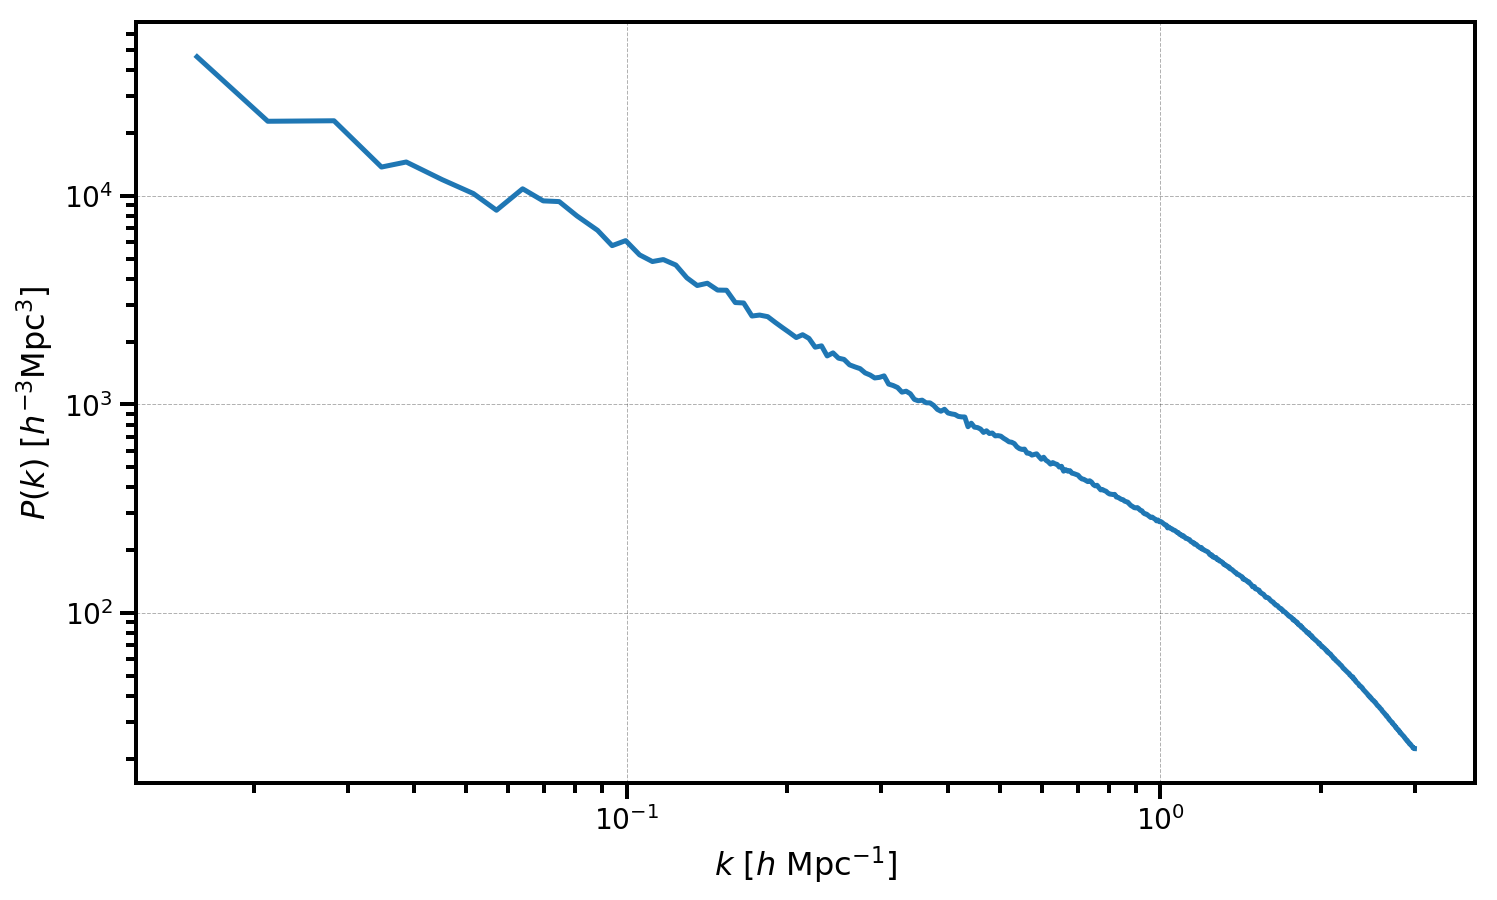

In [17]:
fig1 = plt.figure()

# print the shot noise subtracted P(k)
plt.loglog(Pk['k']*kunit, (Pk['power'].real - Pk.attrs['shotnoise'])*psunit)

# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")
#plt.xlim(0.001, 0.6)
#plt.xlim(0.01, 10.0)
#plt.ylim(1,100000)

pofk_pdf_name = 'pofk_'+sim_box_name+'.pdf'

fig1.savefig(pofk_pdf_name)

In [18]:
# add RSD
#aS = 1/(1+0.5)
#print(aS)
print(math.sqrt(2./3.))
#anum = 13.60 # 1000/69.7 # 1000. / ( sqrt(2/3) *1.29127 * 100 * 0.697 ) ; H in km/s/Mpc.
anum = 13.60 * math.sqrt(2./3.)
# Using the formula: s = x + v_p.n_z / (a H) = x + sqrt(a) V_gadget*n_z /(a H)
#                      = x + V_gadget*n_z /(sqrt(a) H), H = 100 h, in km/s/kpc.
print(anum)
#data['RSDPosition'] = data['Position'] + data['GadgetVelocity'] * mylos
#data['RSDPosition'] = data['Position'] + data['GadgetVelocity']*mylos*math.sqrt(az)/Hubble
vnorm = mpc_unit /(100.0*aHofa)/math.sqrt(1.0 + Redshift)
print('vnorm =', vnorm)
#data['RSDPosition'] = data['Position'] + anum* data['GadgetVelocity'] * mylos
data['RSDPosition'] = data['Position'] + vnorm * data['GadgetVelocity'] * mylos

0.816496580928
11.1043535006
('vnorm =', 10.238251947232518)


In [19]:
# convert to a MeshSource, using TSC (or CIC) interpolation on 256^3 mesh
mesh_rsd = data.to_mesh(resampler='cic', Nmesh=myNmesh, compensated=True, position='RSDPosition')

In [20]:
# compute the 2D power AND ell=0,2,4 multipoles
r = FFTPower(mesh_rsd, mode='2d', dk=mydk, kmin=mykmin, kmax=mykmax, Nmu=5, los=mylos, poles=[0,2,4])

[ 000107.38 ]   0: 10-09 10:44  CatalogMesh     INFO     Chunk 0 ~ 4194304 / 134217728 
[ 000109.06 ]   0: 10-09 10:44  CatalogMesh     INFO     painted 4194304 out of 134217728 objects to mesh
[ 000109.07 ]   0: 10-09 10:44  CatalogMesh     INFO     Chunk 4194304 ~ 8388608 / 134217728 
[ 000110.62 ]   0: 10-09 10:44  CatalogMesh     INFO     painted 8388608 out of 134217728 objects to mesh
[ 000110.62 ]   0: 10-09 10:44  CatalogMesh     INFO     Chunk 8388608 ~ 12582912 / 134217728 
[ 000112.10 ]   0: 10-09 10:44  CatalogMesh     INFO     painted 12582912 out of 134217728 objects to mesh
[ 000112.10 ]   0: 10-09 10:44  CatalogMesh     INFO     Chunk 12582912 ~ 16777216 / 134217728 
[ 000113.57 ]   0: 10-09 10:44  CatalogMesh     INFO     painted 16777216 out of 134217728 objects to mesh
[ 000113.57 ]   0: 10-09 10:44  CatalogMesh     INFO     Chunk 16777216 ~ 20971520 / 134217728 
[ 000115.04 ]   0: 10-09 10:45  CatalogMesh     INFO     painted 20971520 out of 134217728 objects to mes

In [21]:
poles = r.poles
print(poles)
print("variables = ", poles.variables)

print(poles)

<BinnedStatistic: dims: (k: 498), variables: 5 total>
('variables = ', ['k', 'power_0', 'power_2', 'power_4', 'modes'])
<BinnedStatistic: dims: (k: 498), variables: 5 total>


In [22]:
# Save to a file
kvec=poles['k'] * kunit
pk0vec=poles['power_0'].real * psunit
pk2vec=poles['power_2'].real * psunit
pk4vec=poles['power_4'].real * psunit
pk0vec2=(poles['power_0'].real - poles.attrs['shotnoise']) * psunit

nk = kvec.shape[0]

print(nk)
print(pk0vec)

#pofka=np.array([kvec,pk0vec,pk2vec,pk4vec,kvec*pk0vec,kvec*pk2vec,kvec*pk4vec])
pofka=np.array([kvec,pk0vec,pk2vec,pk4vec,pk0vec2])

pofkb=np.transpose(pofka)
print pofkb

pofk_rsd_txt_name = 'pofk_rsd_mu_2d_l_'+sim_box_name+'.dat'

np.savetxt(pofk_rsd_txt_name,pofkb,delimiter='\t',newline='\r\n')

498
[           nan            nan 1.76836146e+04 1.14523530e+00
 5.70672743e+03 3.57404590e+03 1.51559235e+03 1.76214668e+03
 2.38368942e+03 4.49965918e+02 1.37893143e+03 6.79789964e+02
 4.45910551e+02 2.39322992e+02 7.21625081e+02 2.27738548e+02
 3.74403003e+02 3.97348532e+02 3.54007292e+02 1.57177021e+02
 3.64881959e+02 1.60173791e+02 1.88660530e+02 1.81451615e+02
 9.93622368e+01 1.46276910e+02 1.27212085e+02 1.00039018e+02
 1.55130136e+02 6.15905699e+01 1.20416847e+02 8.70879269e+01
 1.03019474e+02 6.51939132e+01 5.45783930e+01 4.47211262e+01
 7.51460387e+01 4.21508994e+01 6.80966575e+01 4.53497167e+01
 6.16586280e+01 3.06826266e+01 4.48219687e+01 3.95625028e+01
 4.04922756e+01 4.13268292e+01 3.63264111e+01 2.96256581e+01
 1.62528063e+01 3.39840821e+01 2.32584965e+01 2.41080995e+01
 2.13501016e+01 3.04566622e+01 2.09830466e+01 1.87917623e+01
 2.00179678e+01 2.06173265e+01 2.08473181e+01 1.49324066e+01
 1.88770904e+01 1.85102969e+01 1.61807391e+01 1.76200826e+01
 1.27463149e+01 1.88

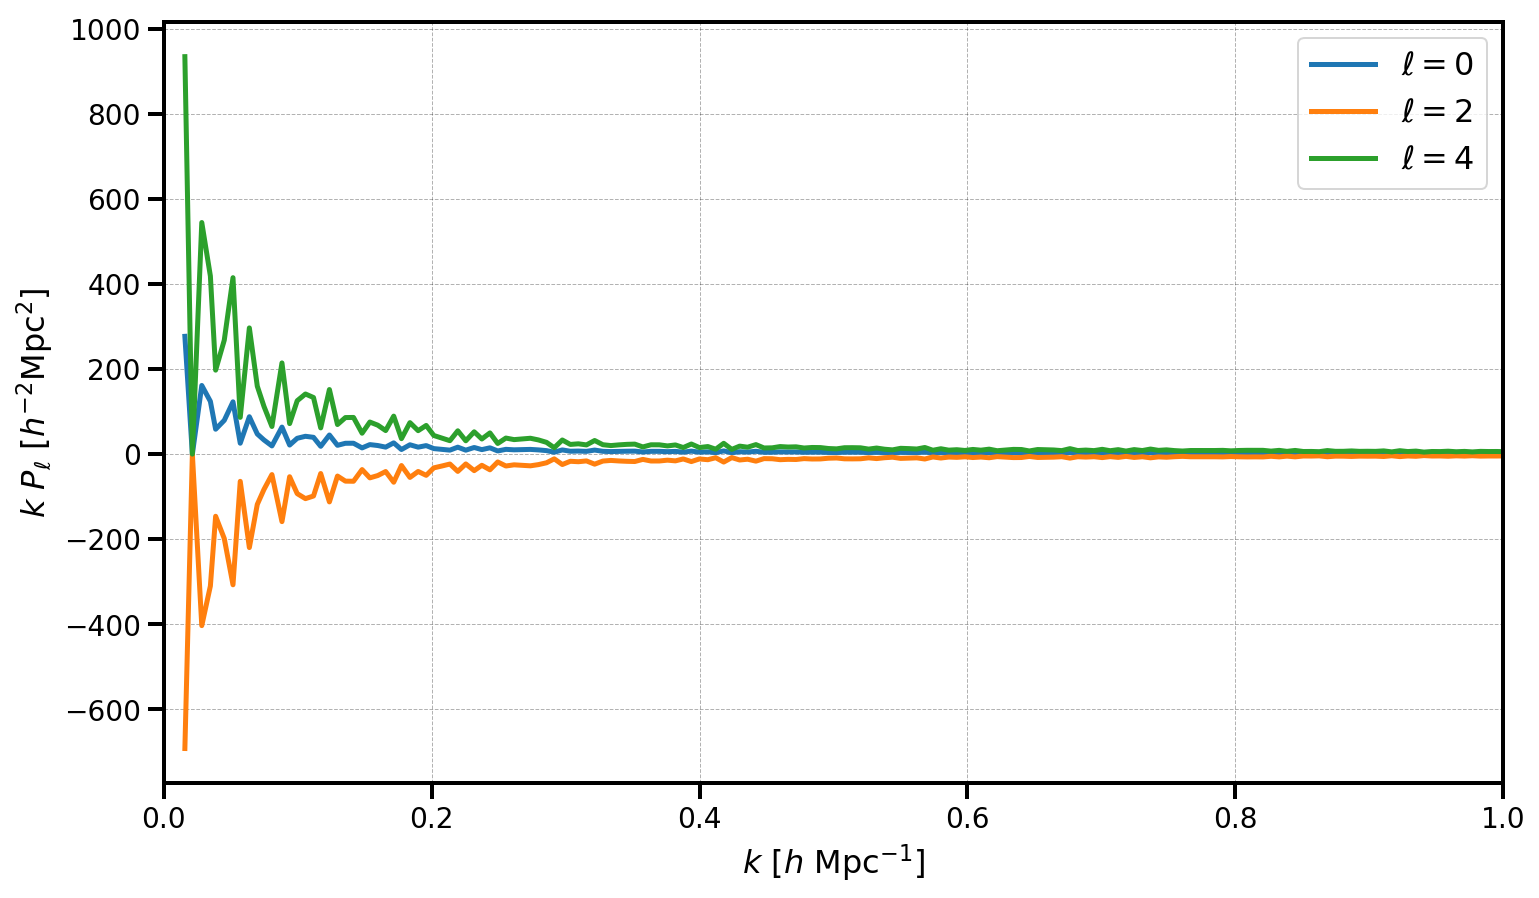

In [23]:
fig5 = plt.figure()

for ell in [0, 2, 4]:
    label = r'$\ell=%d$' % (ell)
    P = poles['power_%d' %ell].real
    if ell == 0: P = P - poles.attrs['shotnoise']
    plt.plot(poles['k']*kunit, poles['k']*kunit * P*psunit, label=label)


#        plt.plot(poles['k'], P, label=label)
#    plt.plot(poles['k'], poles['k'] * P, label=label)


# format the axes
plt.legend(loc=0)
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$k \ P_\ell$ [$h^{-2} \mathrm{Mpc}^2$]")
plt.xlim(0.0, 1)
#plt.ylim(-1000,3000)
#plt.ylim(-2000,3000)

pofk_rsd_pdf_name = 'pofk_rsd_mu_2d_l_'+sim_box_name+'.pdf'

fig5.savefig(pofk_rsd_pdf_name)